<a href="https://colab.research.google.com/github/awaris123/OnlineSocialNetworkAnalysis/blob/master/OSNA_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyGithub

  Using cached PyGithub-1.53-py3-none-any.whl (274 kB)
  Using cached Deprecated-1.2.10-py2.py3-none-any.whl (8.7 kB)
  Using cached PyJWT-1.7.1-py2.py3-none-any.whl (18 kB)


In [ ]:
from github import Github
g = Github("a8b3e6cf72a24f9bb9bcb845423ed1249d4223eb")


In [ ]:
help(g)

Help on Github in module github.MainClass object:

class Github(builtins.object)
 |  Github(login_or_token=None, password=None, jwt=None, base_url='https://api.github.com', timeout=15, client_id=None, client_secret=None, user_agent='PyGithub/Python', per_page=30, verify=True, retry=None)
 |  
 |  This is the main class you instantiate to access the Github API v3. Optional parameters allow different authentication methods.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, login_or_token=None, password=None, jwt=None, base_url='https://api.github.com', timeout=15, client_id=None, client_secret=None, user_agent='PyGithub/Python', per_page=30, verify=True, retry=None)
 |      :param login_or_token: string
 |      :param password: string
 |      :param base_url: string
 |      :param timeout: integer
 |      :param client_id: string
 |      :param client_secret: string
 |      :param user_agent: string
 |      :param per_page: int
 |      :param verify: boolean or string
 |      :param

In [ ]:
import pickle

In [ ]:
def get_candidates():
    names = ["smn", "kevinclark", "kunstreich", "automatthew"]
    candidates = []
    for name in names:
        gAccount = g.get_user(name)
        candidates.append(gAccount)
    return candidates
    


In [ ]:
def crawl_candidates(candidates, depth=1):
    social_graph = {}
    
    candidates = set(candidates)
    for _ in range(depth):
        next_cand = set()
        for dude in candidates:
            d_id = dude.id
            if d_id not in social_graph:
                try:
                    social_graph[d_id] = list(dude.get_followers()[:5])
                except IndexError as e:
                    social_graph[d_id] = list(dude.get_followers())
                next_cand.update(social_graph[d_id])
        candidates = next_cand
            
    return social_graph
        
    
candidates = get_candidates()
network = crawl_candidates(candidates,depth=3)


In [ ]:
for k, v in network.items():
    print(k, len(v))

20 5
1065 5
105 5
464 5
200 5
2655 5
182 5
755 5
53684 5
2 5
33829 5
43731 5
105723 5
444 5
15692 5
45 5
44849 5
1051 5
38 5
192 5
21019 5
2520 5
11321 5
911 5
110297 5
1817 5
7783 5
1516 5
440128 5
46832 5
32362 5
430 5
76 5
781 5
2214 5
19621 5
12596 5
26 5
199 5
19172 5
1897173 5
108113 5
5 5
19230 5
57921 5
42780 5
2543 5
48890 5
122 5
325 5
4158 5
1088 5
45057 5
4938 5
33505 5
25003 5
117560 5
784490 5
175 5
1406216 3
1391 5
248779 5
1553 5
21111 5
373 5
426128 5
12015 5
318 5
67664 5
307 5
77296 5
1742 5
18 5
90 5
1022633 5
124 5
108762 5
110500 5
163 5
5274 5
1080630 1
2208 5
31807 5
2173 5
52195 5
47 5
28991 5
3818 5
989 5
165551 5
27486 5
2160 5
2363 5
167075 5
304738 4
1186 5
37 5
41004 5
3 5
26019 5
29370 5


20, 1065, 105, 464

In [ ]:
sum([len(v) for v in network.values()])

498

In [ ]:

pickle.dump(network, open("network.pkl", "wb"))

In [14]:
#https://stackoverflow.com/questions/50624042/how-to-unpickle-a-file-that-has-been-hosted-in-a-web-url-in-python
import cloudpickle as cp
from urllib.request import urlopen
loaded_pickle_object = cp.load(urlopen("https://github.com/awaris123/OnlineSocialNetworkAnalysis/blob/master/network.pkl?raw=true"))

In [22]:
import itertools

# turn into edge list
edge_list=[[(k, dude.id) for dude in v] for k,v in loaded_pickle_object.items()]
#https://stackoverflow.com/a/953097
edge_list = list(itertools.chain(*edge_list))

In [25]:
total_nodes = set()
for k,v in edge_list:
  total_nodes.update([k,v])
len(total_nodes)

363

In [26]:
!pip install networkx

In [27]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(edge_list)

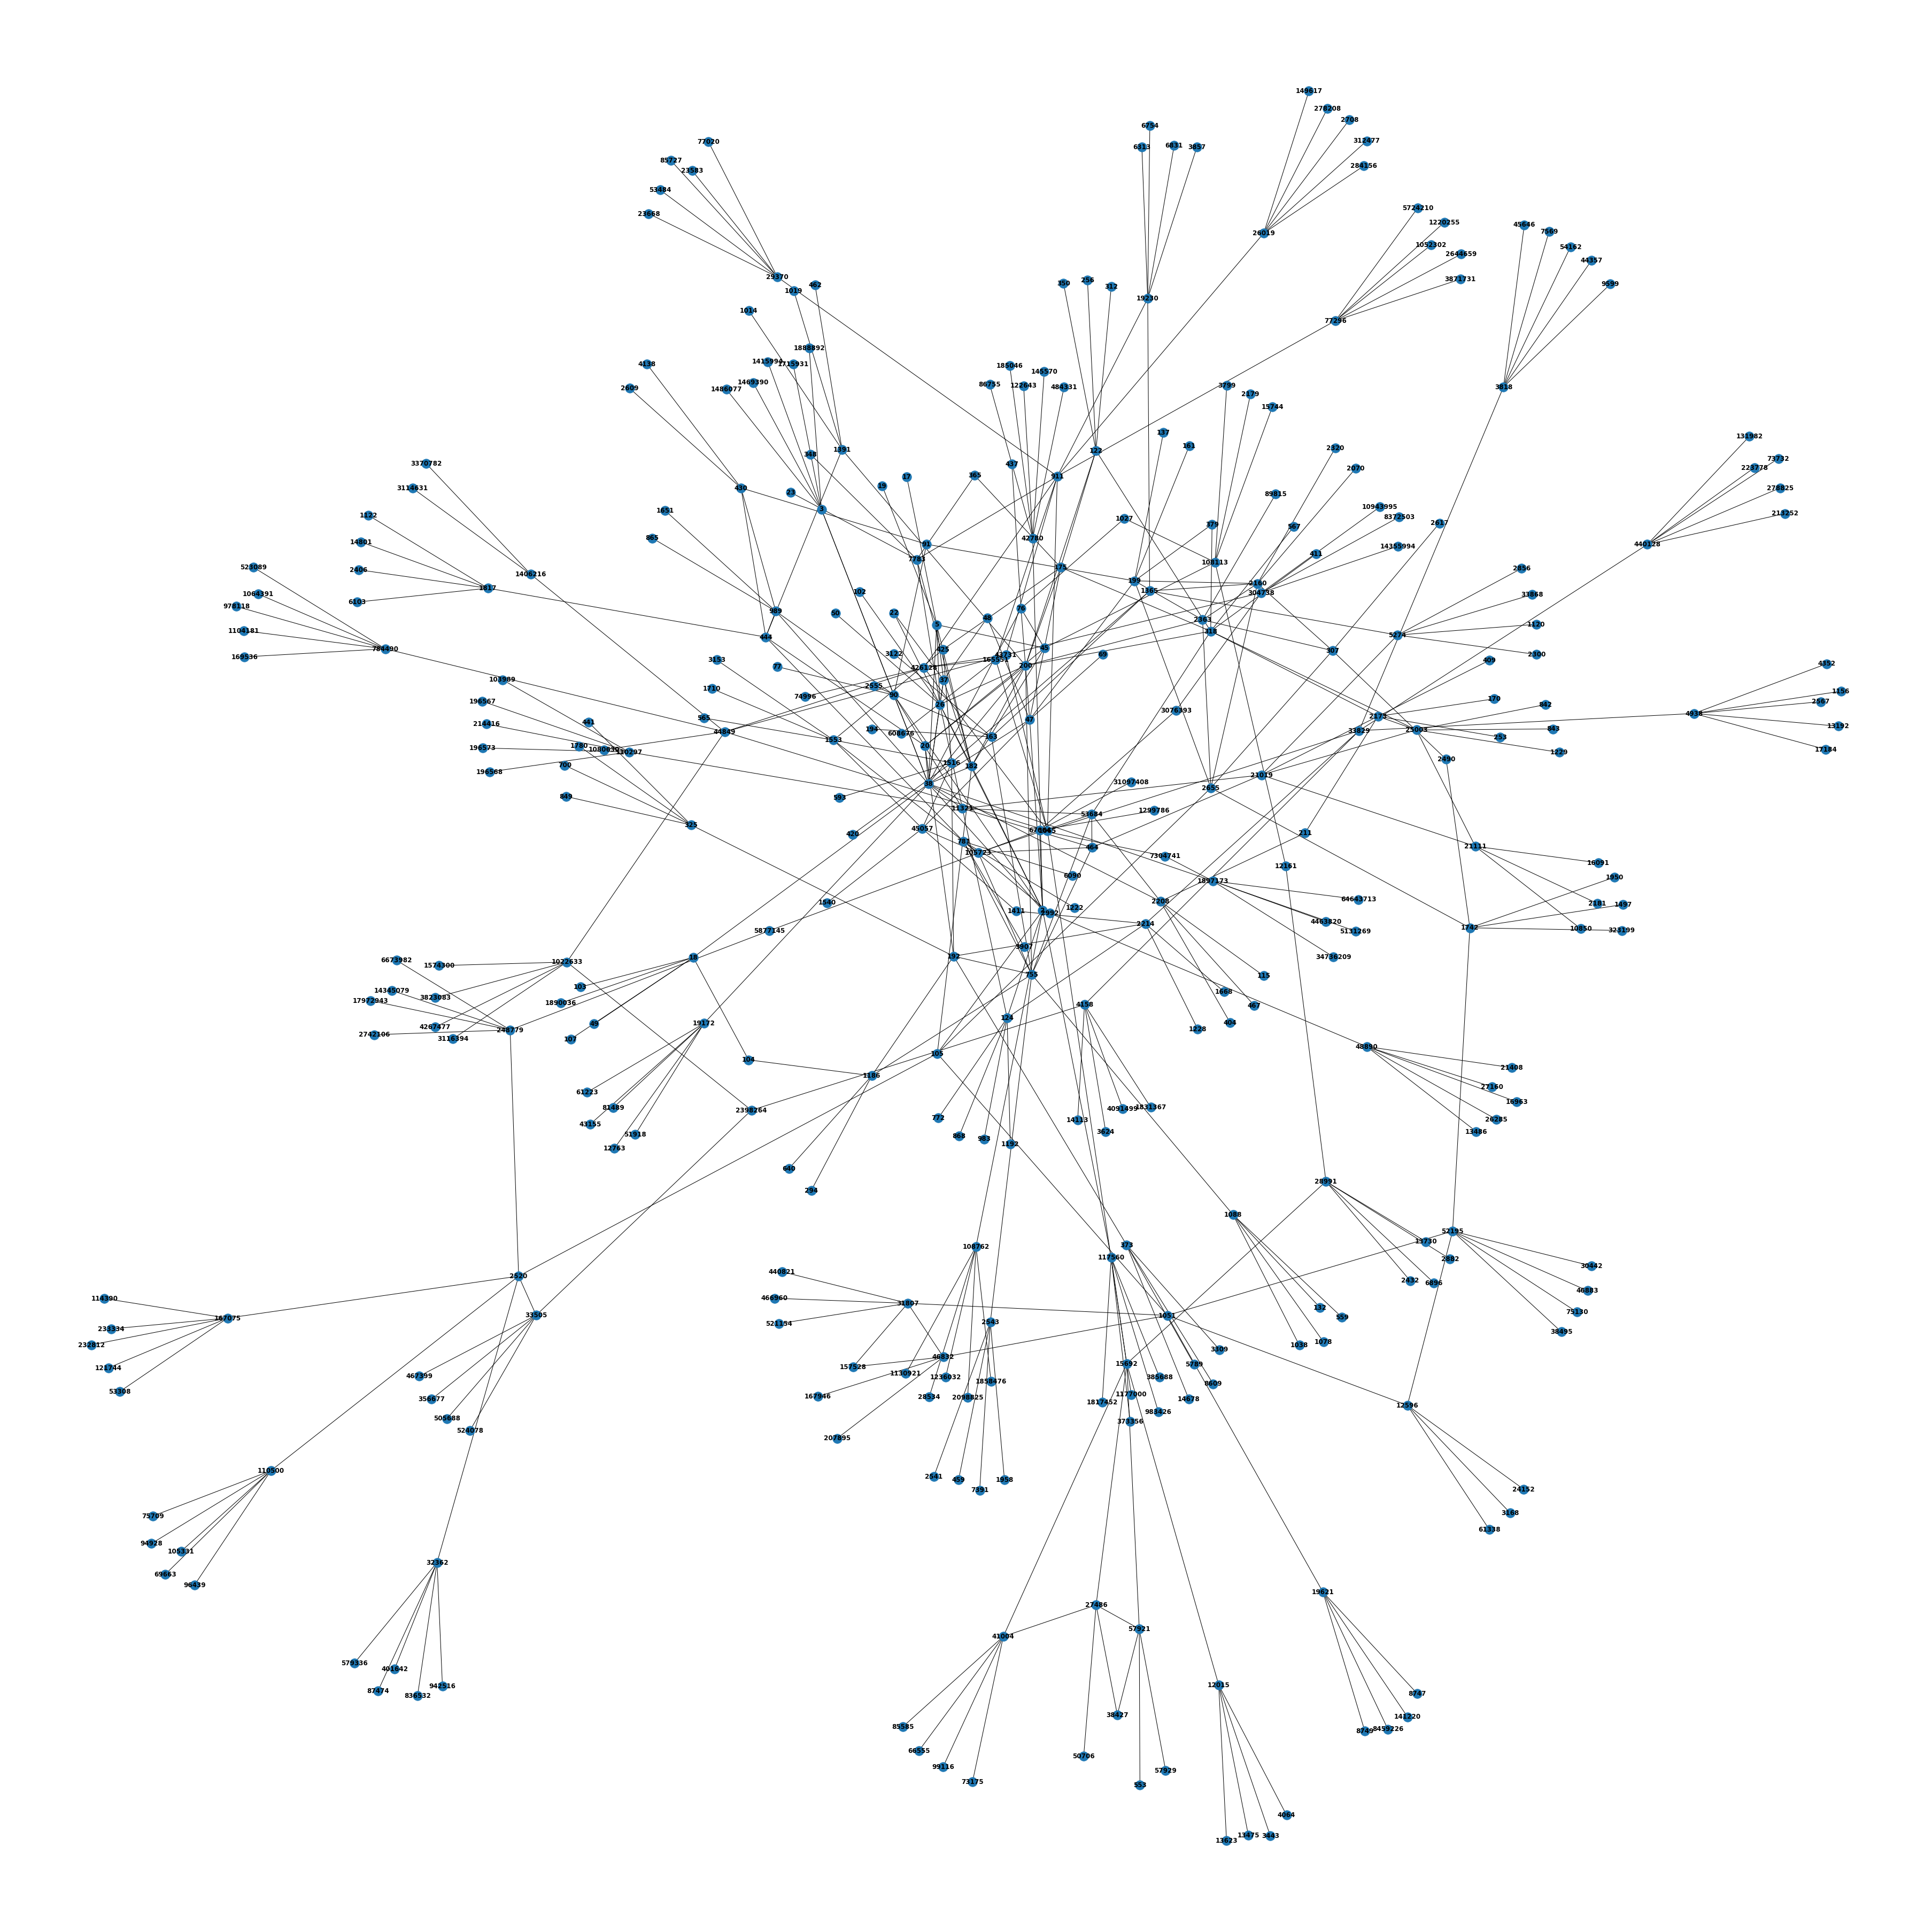

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()
